In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
# from xgboost import XGBClassifier
from sklearn.ensemble import (AdaBoostClassifier,
                             BaggingClassifier,
                              GradientBoostingClassifier,
                             RandomForestClassifier
                             )
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report,
                            confusion_matrix,
                            accuracy_score,
                            recall_score,
                            precision_score,
                            f1_score,
                            make_scorer)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


In [9]:
#1.LOAD DATA
data=pd.read_csv("BankChurners (1).csv")

In [10]:
#2.DATA OVERVIEW
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [11]:
data.shape

(10127, 21)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [12]:
data.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1438.3,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.0,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


In [14]:
data.describe(include=["object"]).T #summy of colums of datatype is object

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [15]:
data["Attrition_Flag"].value_counts(1)
#83% customer exist
#16% customer not exist

Attrition_Flag
Existing Customer    0.83934
Attrited Customer    0.16066
Name: proportion, dtype: float64

In [16]:
#3.DATA PROCESSING
#drop CLINTNUM column not use for analyse
data=data.drop('CLIENTNUM',axis=1)

In [17]:
## Encoding Existing and Attrited customers to 1 and 0 respectively, for analysis.
data["Attrition_Flag"].replace("Existing Customer",1,inplace=True)
data["Attrition_Flag"].replace("Attrited Customer",0,inplace=True)

/tmp/ipykernel_9106/3106706698.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Attrition_Flag"].replace("Existing Customer",1,inplace=True)
/tmp/ipykernel_9106/3106706698.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [18]:
data['Income_Category'].value_counts()

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: count, dtype: int64

In [19]:
#replace abc income with np.nan
data['Income_Category'].replace('abc',np.nan,inplace=True)

/tmp/ipykernel_9106/2076369159.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Income_Category'].replace('abc',np.nan,inplace=True)


In [20]:
data['Income_Category'].value_counts()

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: count, dtype: int64

In [21]:
data['Income_Category'].isnull().sum()  # or data['Income_Category'].info()

1112

In [22]:
data.duplicated().sum()

0

In [23]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [24]:
# Creating a list with column labels that need to be converted from "object" to "category" data type.
cat_cols = [
    'Attrition_Flag',
    'Gender',
    'Education_Level',
    'Marital_Status',
    'Card_Category',
    'Income_Category'
]

# Converting the columns with "object" data type to "category" data type.
data[cat_cols] = data[cat_cols].astype('category')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           9015 non-null   category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

In [26]:
# Checking for new na values, will impute after train-test split to avoid data leakage.
data.isna().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [27]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [28]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [29]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [32]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

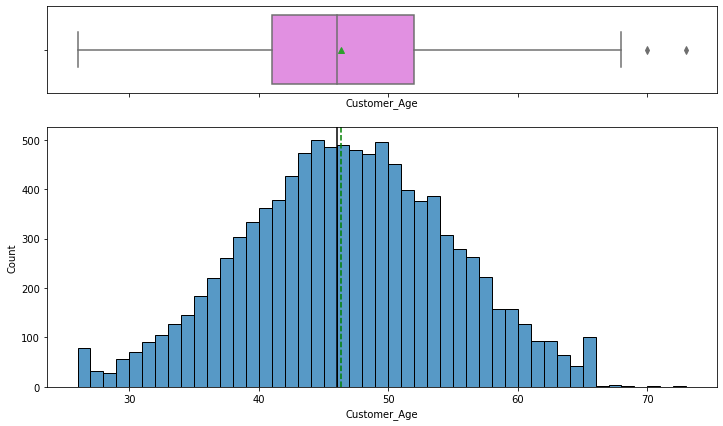

In [33]:
histogram_boxplot(data,'Customer_Age')

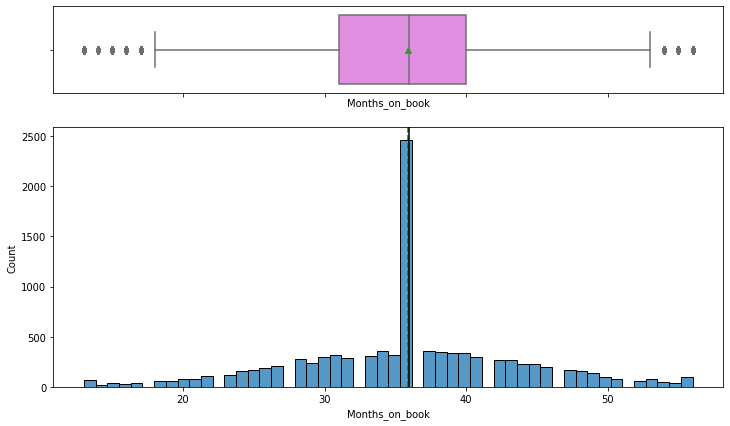

In [34]:
histogram_boxplot(data,'Months_on_book')

In [35]:
data['Months_on_book'].value_counts(1).head(1)

36    0.243211
Name: Months_on_book, dtype: float64

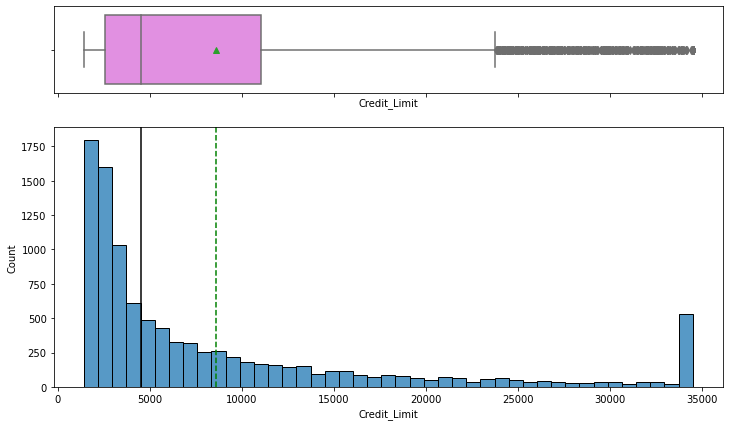

In [36]:
histogram_boxplot(data,'Credit_Limit')

In [37]:
data['Credit_Limit'].min()

1438.3

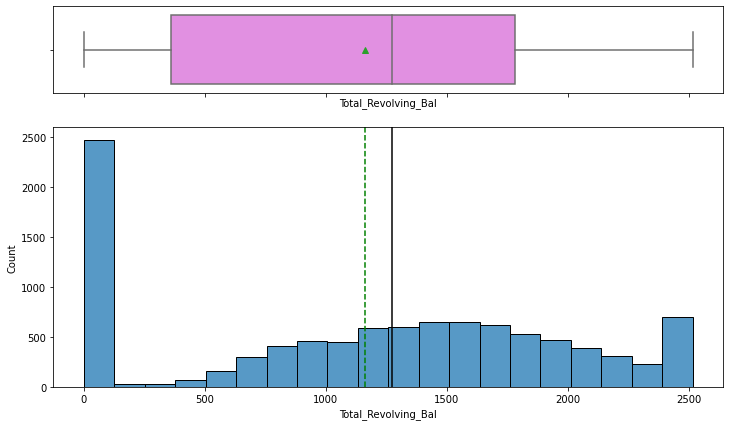

In [38]:
histogram_boxplot(data,'Total_Revolving_Bal')

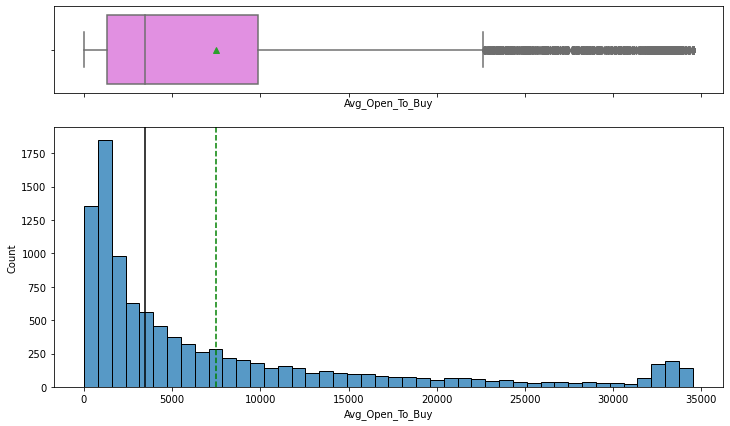

In [39]:
histogram_boxplot(data,'Avg_Open_To_Buy')

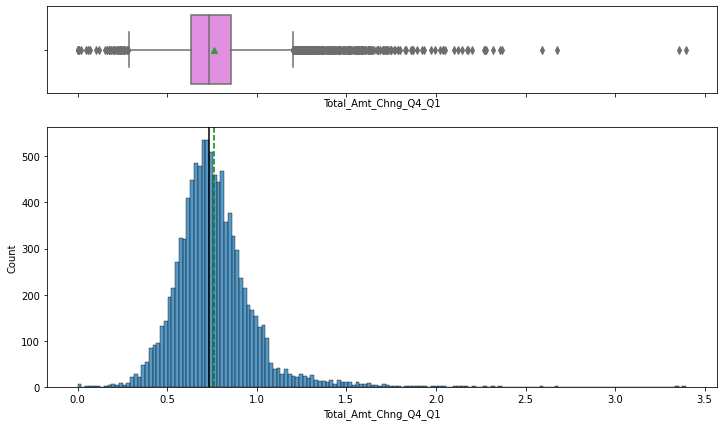

In [40]:
histogram_boxplot(data, 'Total_Amt_Chng_Q4_Q1')

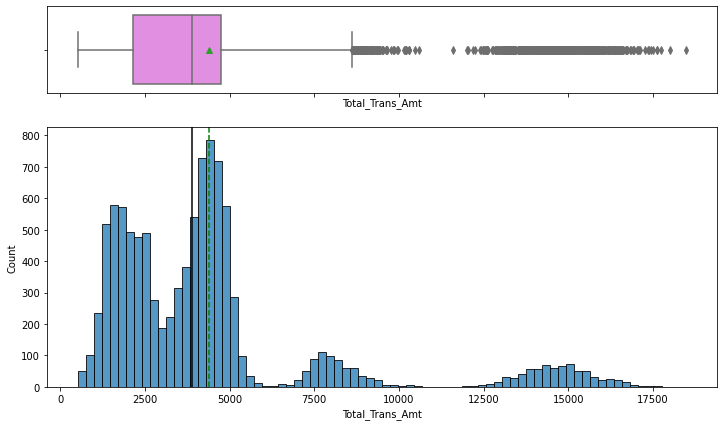

In [41]:
histogram_boxplot(data, 'Total_Trans_Amt')

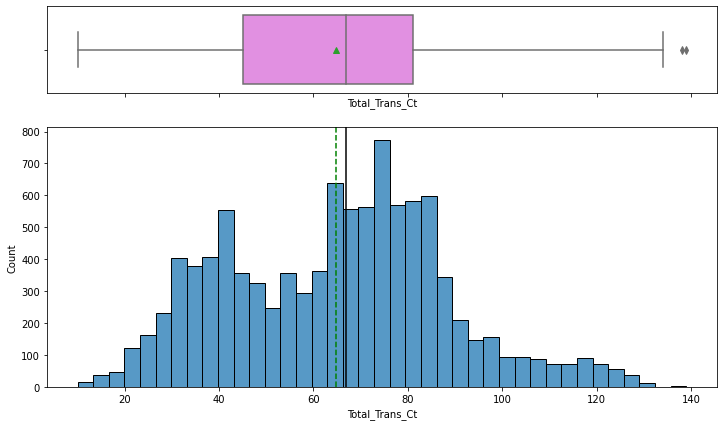

In [42]:
histogram_boxplot(data, 'Total_Trans_Ct')

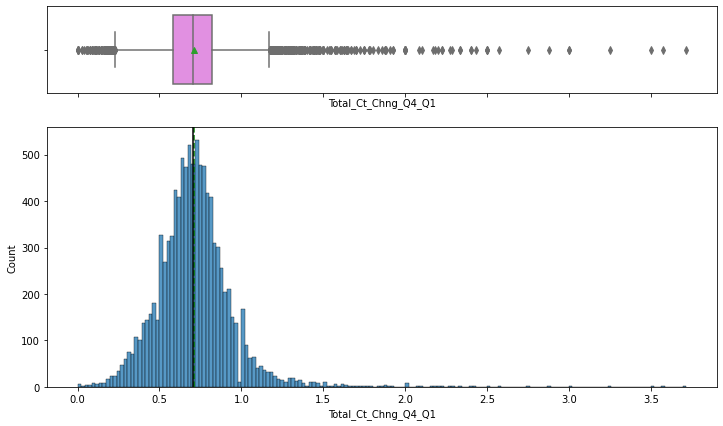

In [43]:
histogram_boxplot(data, 'Total_Ct_Chng_Q4_Q1')

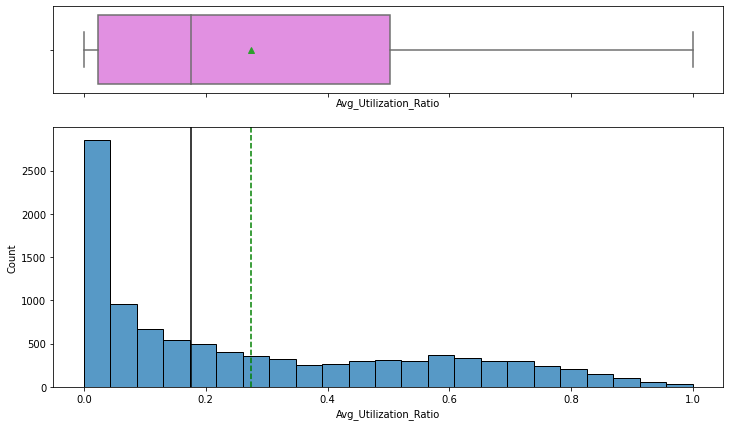

In [44]:
histogram_boxplot(data, 'Avg_Utilization_Ratio')

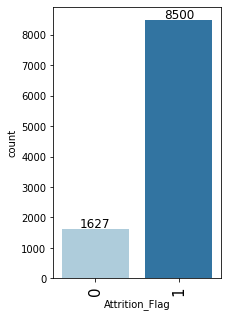

In [45]:
labeled_barplot(data, 'Attrition_Flag')

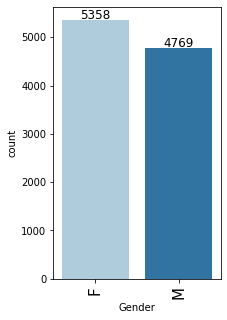

In [46]:
labeled_barplot(data, 'Gender')

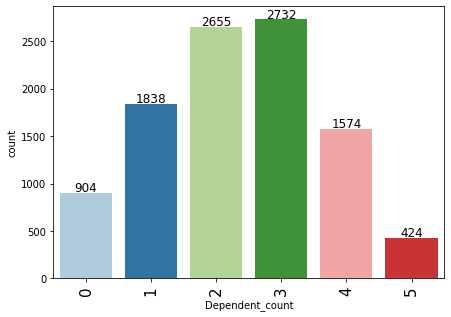

In [47]:
labeled_barplot(data, 'Dependent_count')

In [48]:
# Getting percentages of values
data['Dependent_count'].value_counts(1)

3    0.269774
2    0.262170
1    0.181495
4    0.155426
0    0.089266
5    0.041868
Name: Dependent_count, dtype: float64

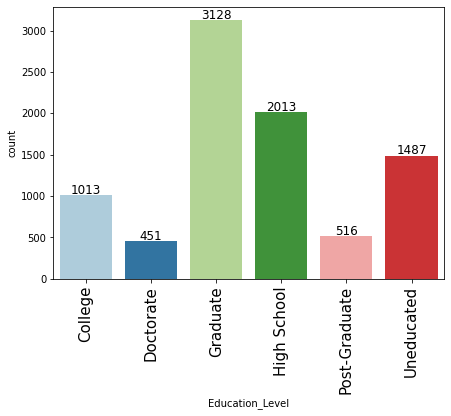

In [49]:
labeled_barplot(data, 'Education_Level')

In [50]:
# Getting percentages of values
data['Education_Level'].value_counts(1)

Graduate         0.363383
High School      0.233852
Uneducated       0.172746
College          0.117681
Post-Graduate    0.059944
Doctorate        0.052393
Name: Education_Level, dtype: float64

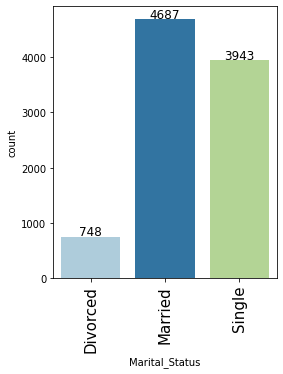

In [51]:
labeled_barplot(data, 'Marital_Status')

In [52]:
# Getting percentages of values
data['Marital_Status'].value_counts(1)

Married     0.499787
Single      0.420452
Divorced    0.079761
Name: Marital_Status, dtype: float64

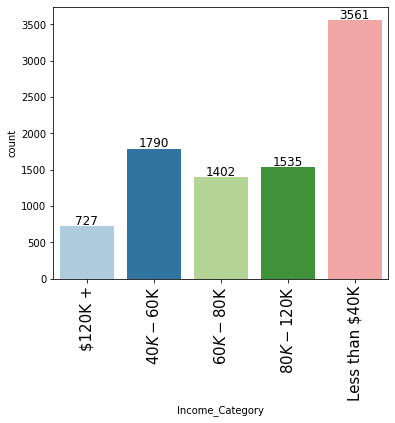

In [53]:
labeled_barplot(data, 'Income_Category')

In [54]:
# Getting percentages of values
data['Income_Category'].value_counts(1)

Less than $40K    0.395008
$40K - $60K       0.198558
$80K - $120K      0.170272
$60K - $80K       0.155519
$120K +           0.080643
Name: Income_Category, dtype: float64

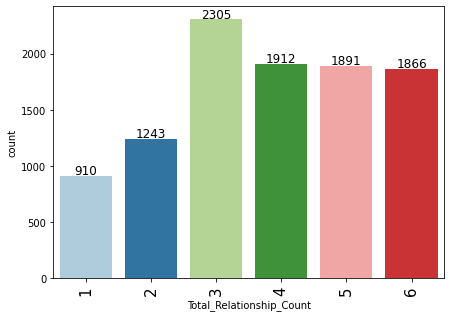

In [55]:
labeled_barplot(data, 'Total_Relationship_Count')

In [56]:
# Getting percentages of values
data['Total_Relationship_Count'].value_counts(1)

3    0.227609
4    0.188802
5    0.186729
6    0.184260
2    0.122741
1    0.089859
Name: Total_Relationship_Count, dtype: float64

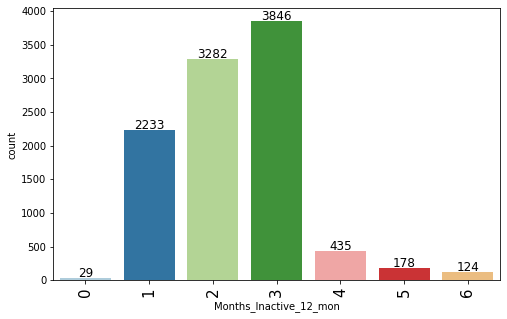

In [57]:
labeled_barplot(data, 'Months_Inactive_12_mon')

In [58]:
# Getting percentages of values
data['Months_Inactive_12_mon'].value_counts(1)

3    0.379777
2    0.324084
1    0.220500
4    0.042954
5    0.017577
6    0.012244
0    0.002864
Name: Months_Inactive_12_mon, dtype: float64

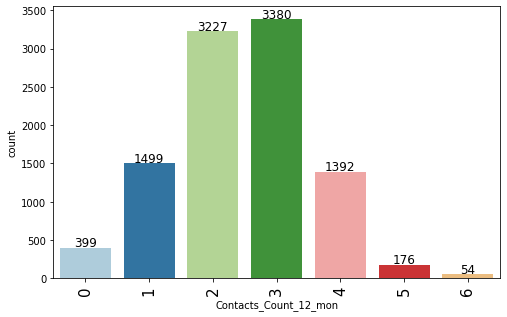

In [59]:
labeled_barplot(data, 'Contacts_Count_12_mon')

In [60]:
# Getting percentages of values
data['Contacts_Count_12_mon'].value_counts(1)

3    0.333761
2    0.318653
1    0.148020
4    0.137454
0    0.039400
5    0.017379
6    0.005332
Name: Contacts_Count_12_mon, dtype: float64

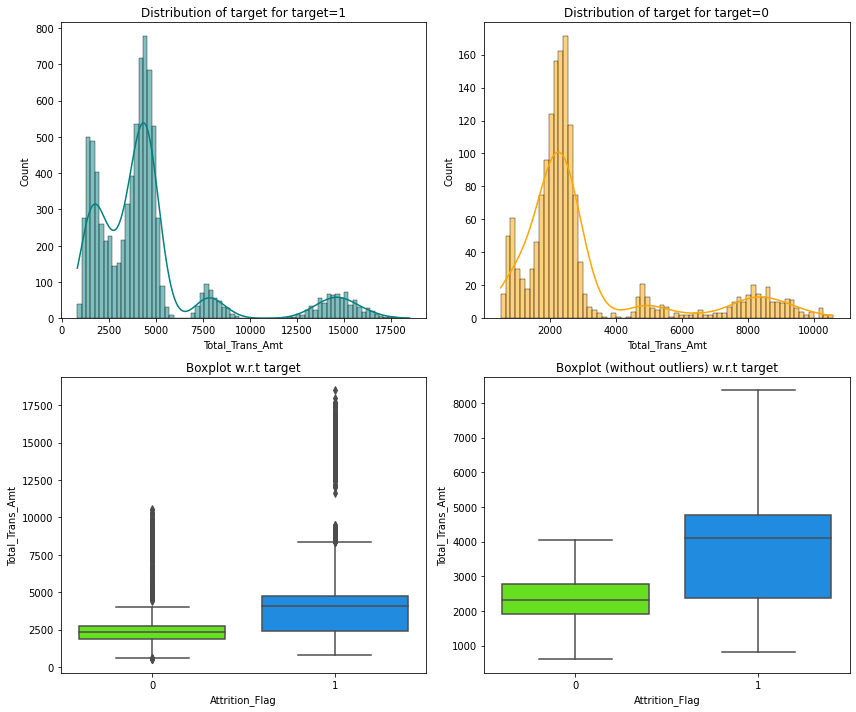

In [61]:
distribution_plot_wrt_target(data, "Total_Trans_Amt", "Attrition_Flag")

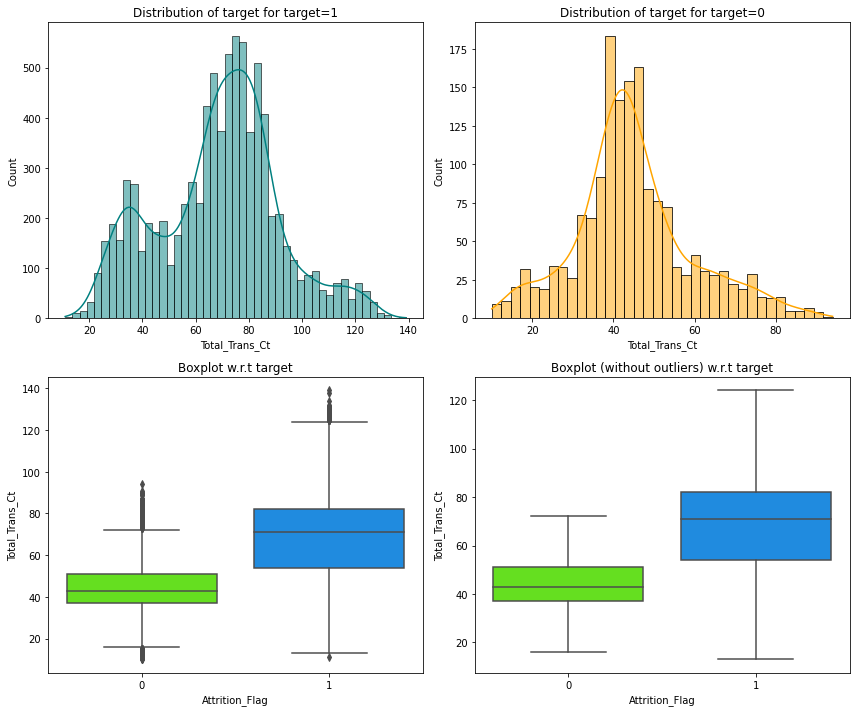

In [62]:
distribution_plot_wrt_target(data, "Total_Trans_Ct", "Attrition_Flag")

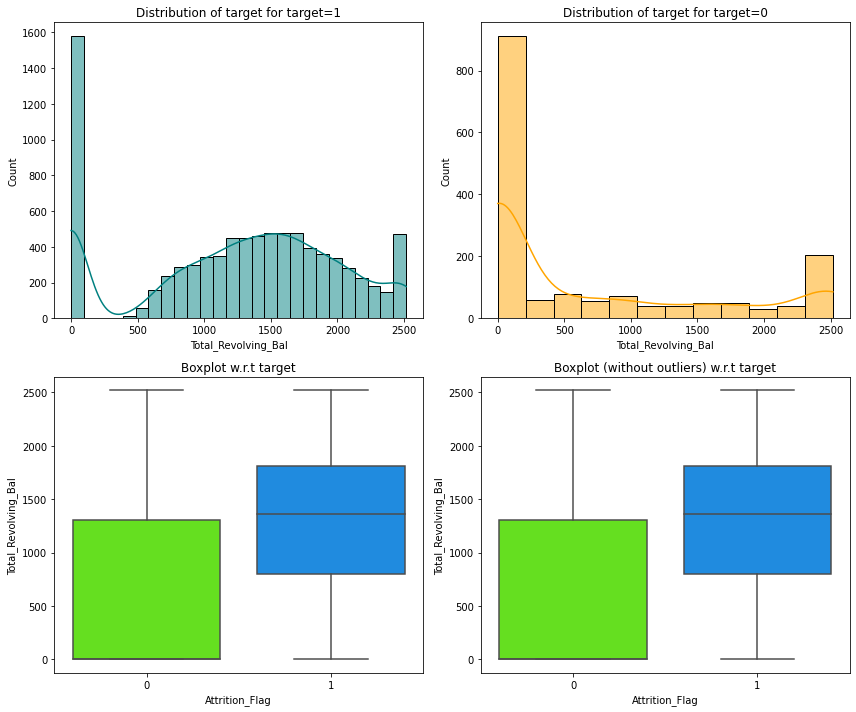

In [63]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")

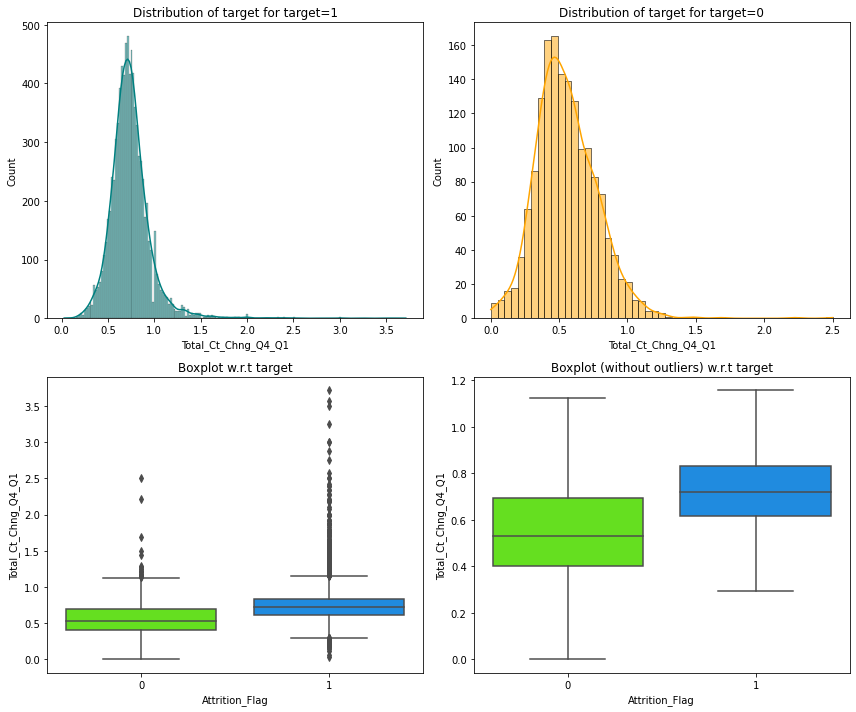

In [64]:
distribution_plot_wrt_target(data, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

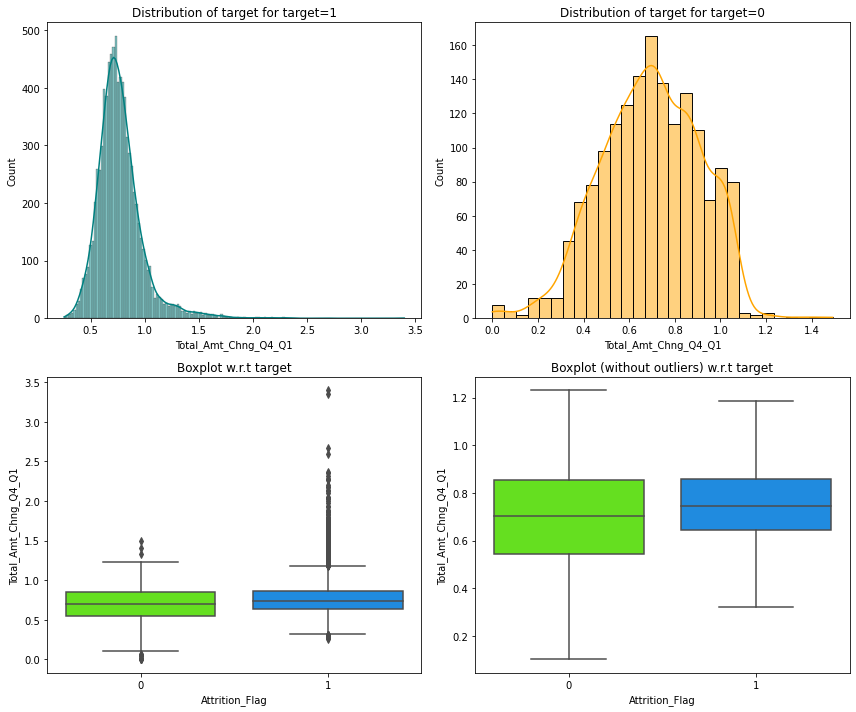

In [65]:
distribution_plot_wrt_target(data, "Total_Amt_Chng_Q4_Q1", "Attrition_Flag")

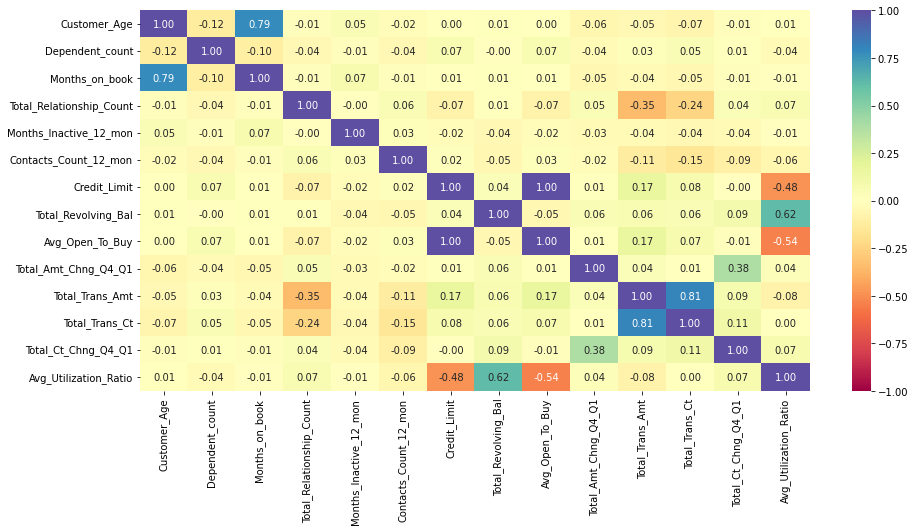

In [66]:
# Created a correlation matrix to show any correlations between non-categorical columns.
# Values of 1 are highly positively correlated, values of -1 are highly negatively correlated.
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

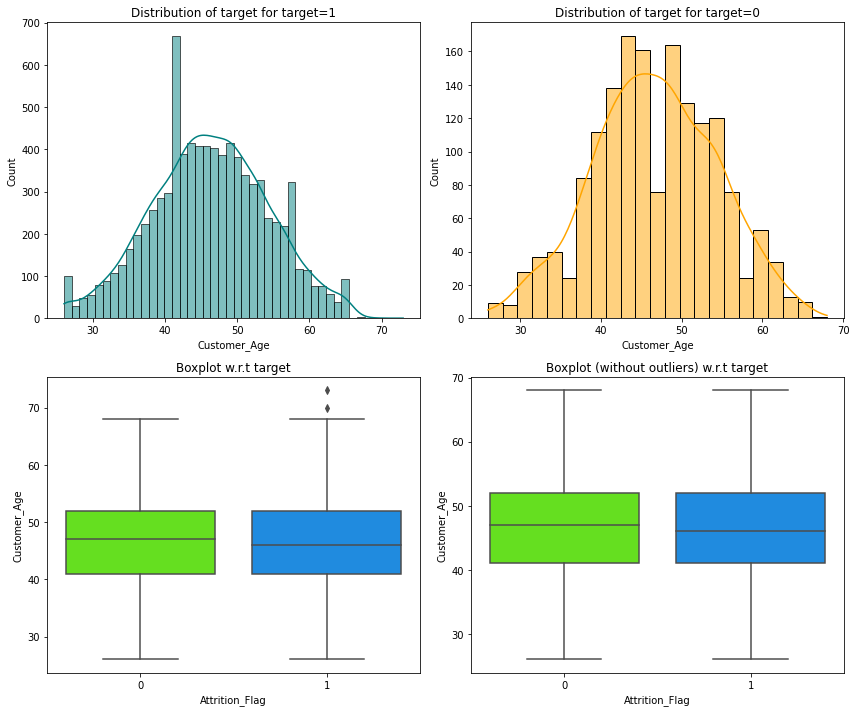

In [67]:
distribution_plot_wrt_target(data, "Customer_Age", "Attrition_Flag")

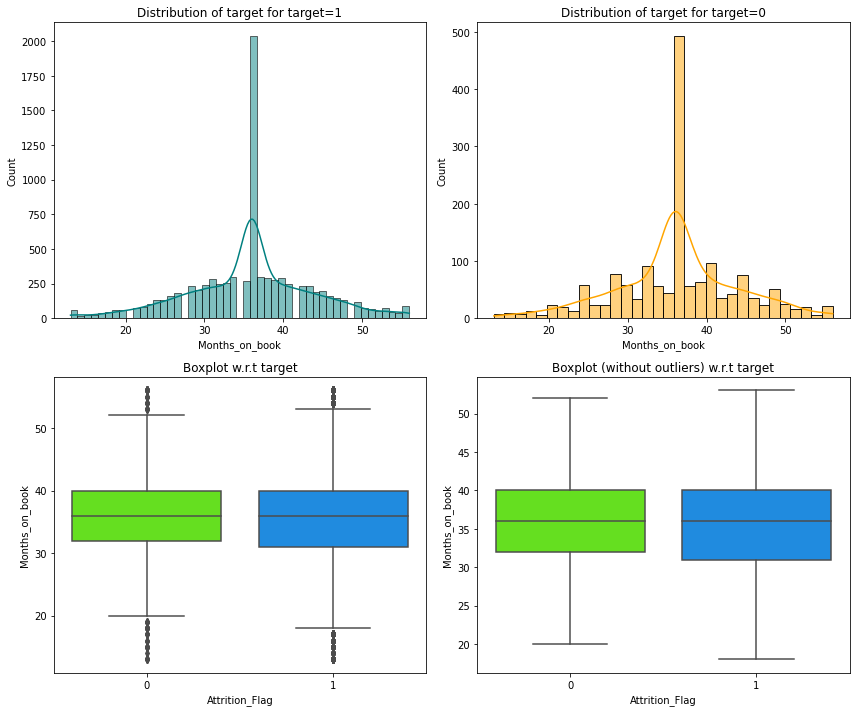

In [68]:
distribution_plot_wrt_target(data, "Months_on_book", "Attrition_Flag")

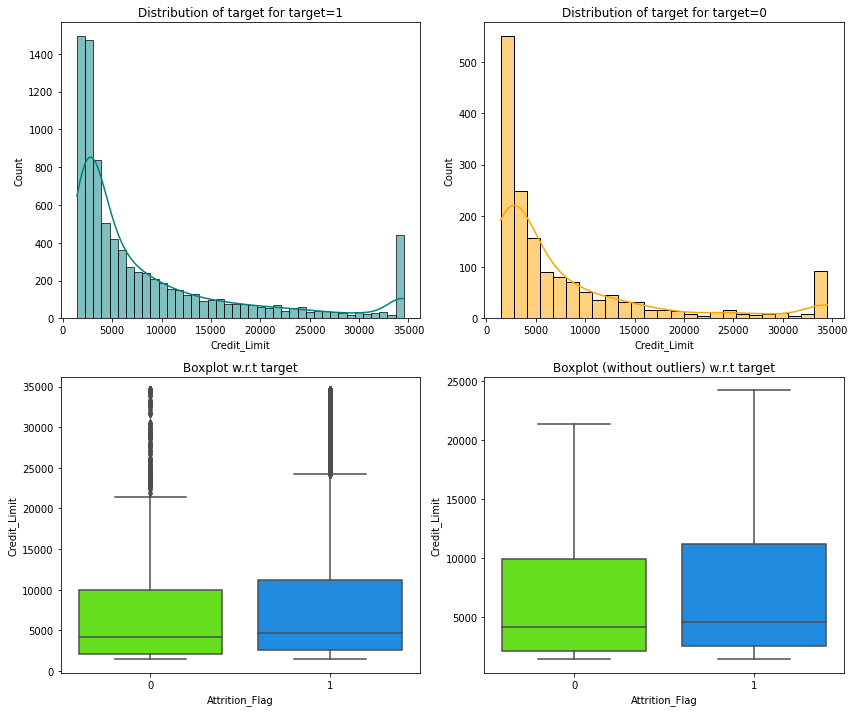

In [69]:
distribution_plot_wrt_target(data, "Credit_Limit", "Attrition_Flag")

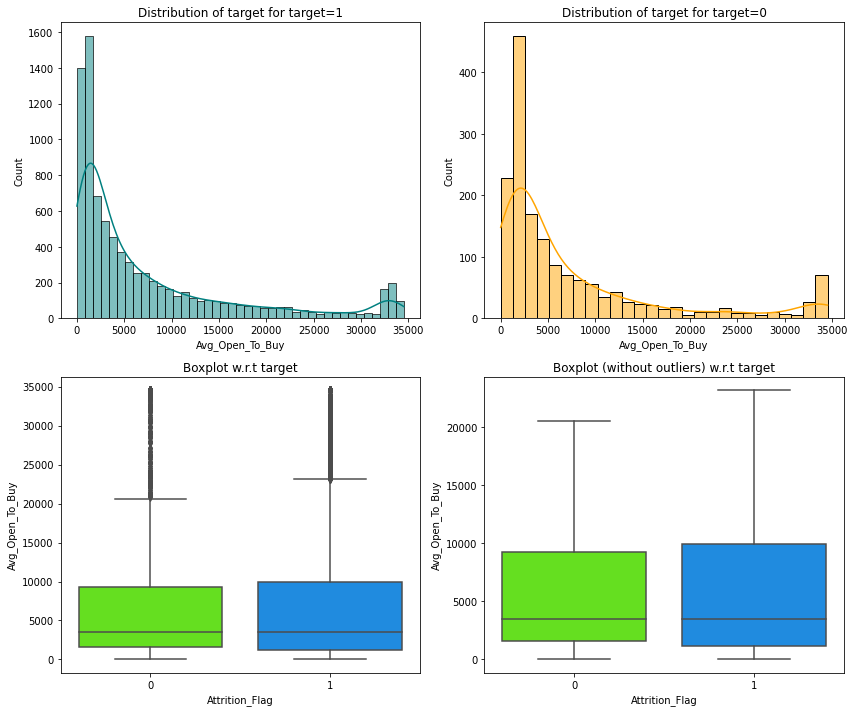

In [70]:
distribution_plot_wrt_target(data, "Avg_Open_To_Buy", "Attrition_Flag")

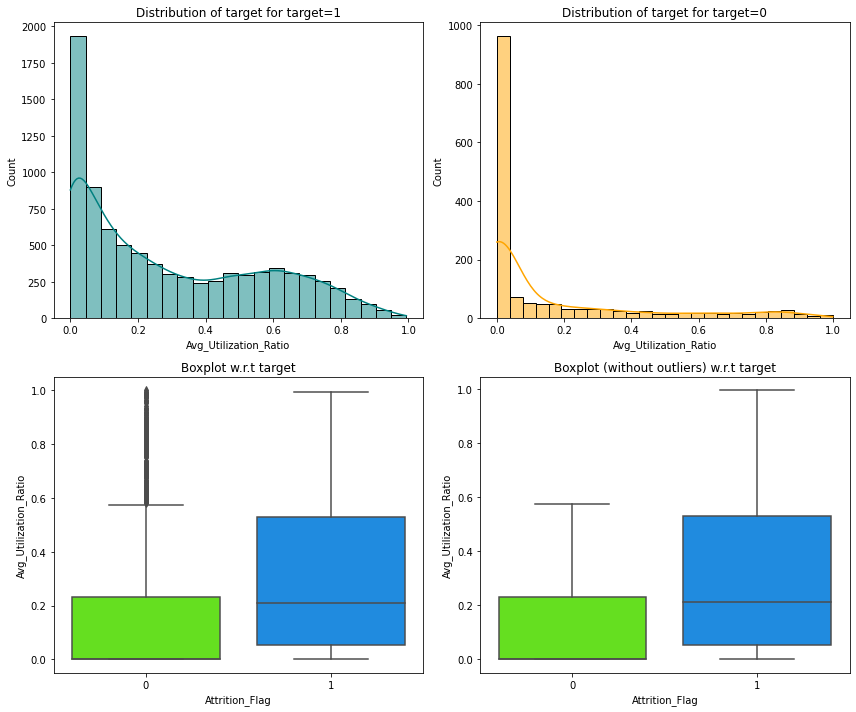

In [71]:
distribution_plot_wrt_target(data, "Avg_Utilization_Ratio", "Attrition_Flag")

Attrition_Flag     0     1    All
Gender                           
All             1627  8500  10127
F                930  4428   5358
M                697  4072   4769
------------------------------------------------------------------------------------------------------------------------


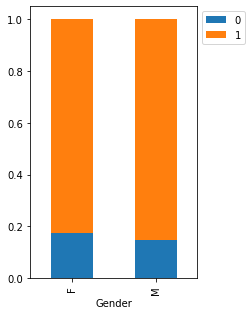

In [72]:
stacked_barplot(data, 'Gender', 'Attrition_Flag')

Attrition_Flag      0     1    All
Dependent_count                   
All              1627  8500  10127
3                 482  2250   2732
2                 417  2238   2655
1                 269  1569   1838
4                 260  1314   1574
0                 135   769    904
5                  64   360    424
------------------------------------------------------------------------------------------------------------------------


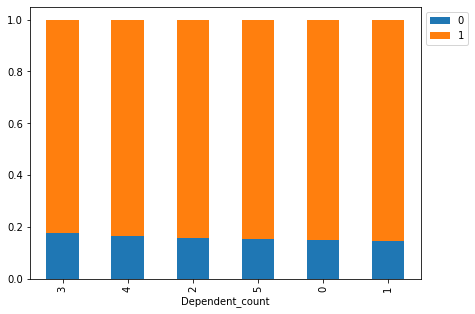

In [73]:
stacked_barplot(data, "Dependent_count", "Attrition_Flag")

Attrition_Flag      0     1   All
Education_Level                  
All              1371  7237  8608
Graduate          487  2641  3128
High School       306  1707  2013
Uneducated        237  1250  1487
College           154   859  1013
Doctorate          95   356   451
Post-Graduate      92   424   516
------------------------------------------------------------------------------------------------------------------------


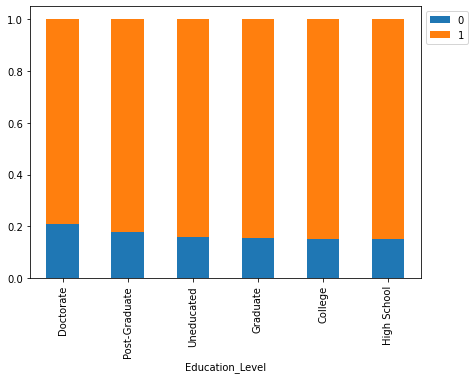

In [74]:
stacked_barplot(data, 'Education_Level', 'Attrition_Flag')

Attrition_Flag     0     1   All
Marital_Status                  
All             1498  7880  9378
Married          709  3978  4687
Single           668  3275  3943
Divorced         121   627   748
------------------------------------------------------------------------------------------------------------------------


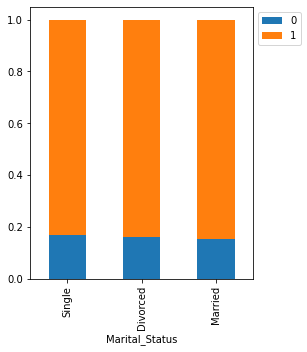

In [75]:
stacked_barplot(data, 'Marital_Status', 'Attrition_Flag')

Attrition_Flag      0     1   All
Income_Category                  
All              1440  7575  9015
Less than $40K    612  2949  3561
$40K - $60K       271  1519  1790
$80K - $120K      242  1293  1535
$60K - $80K       189  1213  1402
$120K +           126   601   727
------------------------------------------------------------------------------------------------------------------------


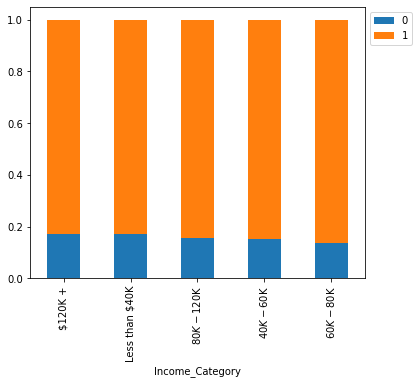

In [76]:
stacked_barplot(data, 'Income_Category', 'Attrition_Flag')

Attrition_Flag     0     1    All
Card_Category                    
All             1627  8500  10127
Blue            1519  7917   9436
Silver            82   473    555
Gold              21    95    116
Platinum           5    15     20
------------------------------------------------------------------------------------------------------------------------


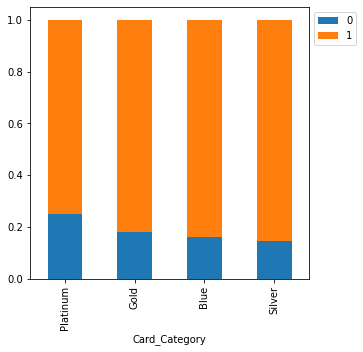

In [77]:
stacked_barplot(data, 'Card_Category', 'Attrition_Flag')

Attrition_Flag               0     1    All
Total_Relationship_Count                   
All                       1627  8500  10127
3                          400  1905   2305
2                          346   897   1243
1                          233   677    910
5                          227  1664   1891
4                          225  1687   1912
6                          196  1670   1866
------------------------------------------------------------------------------------------------------------------------


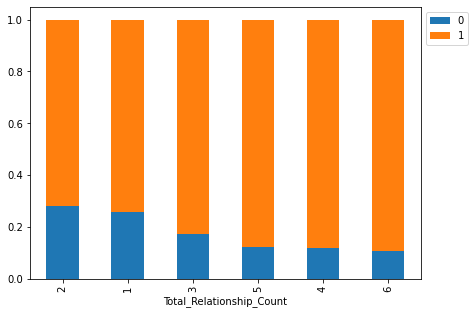

In [78]:
stacked_barplot(data, "Total_Relationship_Count", "Attrition_Flag")

Attrition_Flag             0     1    All
Months_Inactive_12_mon                   
All                     1627  8500  10127
3                        826  3020   3846
2                        505  2777   3282
4                        130   305    435
1                        100  2133   2233
5                         32   146    178
6                         19   105    124
0                         15    14     29
------------------------------------------------------------------------------------------------------------------------


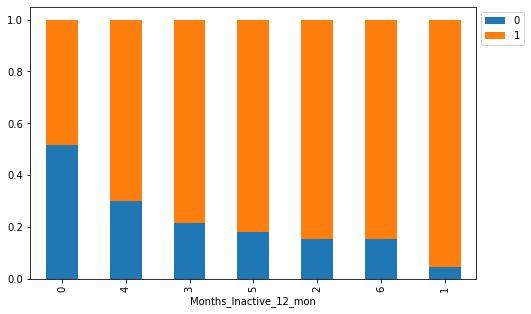

In [79]:
stacked_barplot(data, "Months_Inactive_12_mon", "Attrition_Flag")

Attrition_Flag            0     1    All
Contacts_Count_12_mon                   
All                    1627  8500  10127
3                       681  2699   3380
2                       403  2824   3227
4                       315  1077   1392
1                       108  1391   1499
5                        59   117    176
6                        54     0     54
0                         7   392    399
------------------------------------------------------------------------------------------------------------------------


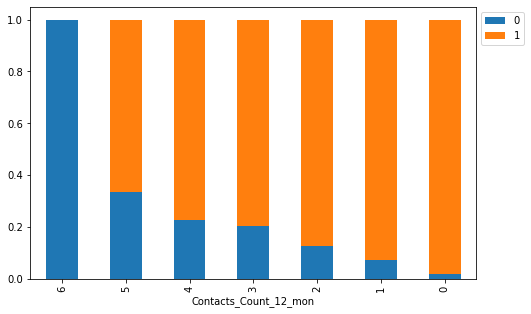

In [80]:
stacked_barplot(data, "Contacts_Count_12_mon", "Attrition_Flag")

In [30]:
#DATA PREPROCESSING

# Code to be used checking for outliers.
Q1 = data.quantile(0.25)  # The 25th percentile.
Q3 = data.quantile(0.75)  # The 75th percentile.

IQR = Q3 - Q1           # Inter Quantile Range (75th perentile - 25th percentile)

lower = Q1 - 1.5 * IQR  # Finding the lower bounds for all values. All values outside these bounds are outliers.
upper = Q3 + 1.5 * IQR  # Finding the upper bounds for all values. All values outside these bounds are outliers.

AssertionError: 

In [82]:
# Checking the percentages of outliers, as defined by the previous cell.
((data.select_dtypes(include=["float64", "int64"]) < lower)
    |(data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

Customer_Age                0.019749
Dependent_count             0.000000
Months_on_book              3.811593
Total_Relationship_Count    0.000000
Months_Inactive_12_mon      3.268490
Contacts_Count_12_mon       6.211119
Credit_Limit                9.716599
Total_Revolving_Bal         0.000000
Avg_Open_To_Buy             9.509233
Total_Amt_Chng_Q4_Q1        3.900464
Total_Trans_Amt             8.847635
Total_Trans_Ct              0.019749
Total_Ct_Chng_Q4_Q1         3.910339
Avg_Utilization_Ratio       0.000000
dtype: float64

In [83]:
# Creating the independent variable data frame.
X = data.drop('Attrition_Flag', axis=1)
# Creating the dependent variable data frame.
y = data['Attrition_Flag']

In [171]:
# Splitting data into training and temp data frames.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=1, stratify=y)

In [172]:
# Splitting temp data frame into validation and test data frames.
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=1, stratify=y_temp)

In [173]:
# Printing the size of the Training, Validation, and Test data frames.
print("*"*40)
print("Shape of Training Set : ", X_train.shape)
print("Shape of Validation Set", X_val.shape)
print("Shape of Test Set : ", X_test.shape)
print("*"*40)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("*"*40)
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print("*"*40)
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))
print("*"*40)

****************************************
Shape of Training Set :  (5063, 19)
Shape of Validation Set (3038, 19)
Shape of Test Set :  (2026, 19)
****************************************
Percentage of classes in training set:
1    0.839423
0    0.160577
Name: Attrition_Flag, dtype: float64
****************************************
Percentage of classes in validation set:
1    0.839368
0    0.160632
Name: Attrition_Flag, dtype: float64
****************************************
Percentage of classes in test set:
1    0.839092
0    0.160908
Name: Attrition_Flag, dtype: float64
****************************************


In [206]:
# Printing the number of na values in each data frame.
# The columns with na values are aleady known from previous lines.
print("Number of X_train na values:", X_train.isna().sum().sum())
print("*" * 30)
print("Number of X_val na values:", X_val.isna().sum().sum())
print("*" * 30)
print("Number of X_test na values:", X_test.isna().sum().sum())

Number of X_train na values: 0
******************************
Number of X_val na values: 0
******************************
Number of X_test na values: 0


In [207]:
# Creating an imputer to impute values by the mode.
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [208]:
# Creating list of column labels that need to be imputed.
col_impute = ['Education_Level', 'Income_Category', 'Marital_Status']

In [209]:
# Imputing X_train columns.
X_train[col_impute] = imp_mode.fit_transform(X_train[col_impute])
# Imputing X_val columns.
X_val[col_impute] = imp_mode.fit_transform(X_val[col_impute])
# Imputing X_test columns.
X_test[col_impute] = imp_mode.fit_transform(X_test[col_impute])

/home/gurvindra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/gurvindra/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/home/gurvindra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [210]:
# Printing the number of na values in each data frame.
print("Number of X_train na values:", X_train.isna().sum().sum())
print("*" * 30)
print("Number of X_val na values:", X_val.isna().sum().sum())
print("*" * 30)
print("Number of X_test na values:", X_test.isna().sum().sum())

Number of X_train na values: 0
******************************
Number of X_val na values: 0
******************************
Number of X_test na values: 0


In [211]:
# Dropping first of each encoded column to reduce data frame size.

# Encoding X_train data frame categorical columns.
X_train = pd.get_dummies(X_train, columns=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], drop_first=True)
# Encoding X_val data frame categorical columns.
X_val = pd.get_dummies(X_val, columns=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], drop_first=True)
# Encoding X_test data frame categorical columns.
X_test = pd.get_dummies(X_test, columns=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], drop_first=True)

In [212]:
# Printing shape of new data frames.
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (5063, 29)
Shape of X_val: (3038, 29)
Shape of X_test: (2026, 29)


In [213]:
# Checking information of new data frame's columns.
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5063 entries, 5930 to 10034
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    5063 non-null   int64  
 1   Dependent_count                 5063 non-null   int64  
 2   Months_on_book                  5063 non-null   int64  
 3   Total_Relationship_Count        5063 non-null   int64  
 4   Months_Inactive_12_mon          5063 non-null   int64  
 5   Contacts_Count_12_mon           5063 non-null   int64  
 6   Credit_Limit                    5063 non-null   float64
 7   Total_Revolving_Bal             5063 non-null   int64  
 8   Avg_Open_To_Buy                 5063 non-null   float64
 9   Total_Amt_Chng_Q4_Q1            5063 non-null   float64
 10  Total_Trans_Amt                 5063 non-null   int64  
 11  Total_Trans_Ct                  5063 non-null   int64  
 12  Total_Ct_Chng_Q4_Q1           

In [214]:
# Checking information of new data frame's columns.
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3038 entries, 9952 to 1898
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    3038 non-null   int64  
 1   Dependent_count                 3038 non-null   int64  
 2   Months_on_book                  3038 non-null   int64  
 3   Total_Relationship_Count        3038 non-null   int64  
 4   Months_Inactive_12_mon          3038 non-null   int64  
 5   Contacts_Count_12_mon           3038 non-null   int64  
 6   Credit_Limit                    3038 non-null   float64
 7   Total_Revolving_Bal             3038 non-null   int64  
 8   Avg_Open_To_Buy                 3038 non-null   float64
 9   Total_Amt_Chng_Q4_Q1            3038 non-null   float64
 10  Total_Trans_Amt                 3038 non-null   int64  
 11  Total_Trans_Ct                  3038 non-null   int64  
 12  Total_Ct_Chng_Q4_Q1            

In [215]:
# Checking information of new data frame's columns.
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 3043 to 215
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    2026 non-null   int64  
 1   Dependent_count                 2026 non-null   int64  
 2   Months_on_book                  2026 non-null   int64  
 3   Total_Relationship_Count        2026 non-null   int64  
 4   Months_Inactive_12_mon          2026 non-null   int64  
 5   Contacts_Count_12_mon           2026 non-null   int64  
 6   Credit_Limit                    2026 non-null   float64
 7   Total_Revolving_Bal             2026 non-null   int64  
 8   Avg_Open_To_Buy                 2026 non-null   float64
 9   Total_Amt_Chng_Q4_Q1            2026 non-null   float64
 10  Total_Trans_Amt                 2026 non-null   int64  
 11  Total_Trans_Ct                  2026 non-null   int64  
 12  Total_Ct_Chng_Q4_Q1             

In [216]:
# Defining a function to compute different metrics to check performance of a classification model built using sklearn.
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # Predicting using the independent variables.
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # To compute Accuracy.
    recall = recall_score(target, pred)  # To compute Recall.
    precision = precision_score(target, pred)  # To compute Precision.
    f1 = f1_score(target, pred)  # To compute F1-score.

    # Creating a dataframe of metrics.
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [217]:
# Defining a function to create a confusion matrix to check TP, FP, TN, adn FN values.
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # Predicting using the independent variables.
    y_pred = model.predict(predictors)
    # Creating the confusion matrix.
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    # Plotting the confusion matrix.
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [218]:
models = []  # Empty list to store all the models.

# Appending models into the list.
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("GradientBoost", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))

# Printing model performance scores on training data.
print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = precision_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

# Printing model performance scores on validation data.
print("\n" "Validation Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores_val = precision_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9974135904067717
Random forest: 1.0
AdaBoost: 0.9716080986734932
GradientBoost: 0.9827786828019549


/home/gurvindra/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost: 1.0

Validation Performance:

Bagging: 0.9675907848496681
Random forest: 0.9563898369359121
AdaBoost: 0.9640232108317215
GradientBoost: 0.9670371789957838


/home/gurvindra/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost: 0.9733487833140209


In [219]:
# Synthetic Minority Over Sampling Technique.
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [220]:
models_over = []  # Empty list to store all the models.

# Appending models into the list
models_over.append(("Bagging", BaggingClassifier(random_state=1)))
models_over.append(("Random forest", RandomForestClassifier(random_state=1)))
models_over.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models_over.append(("GradientBoost", GradientBoostingClassifier(random_state=1)))
models_over.append(("XGBoost", XGBClassifier(random_state=1)))

# Printing model performance scores on training data.
print("\n" "Training Performance:" "\n")
for name, model in models_over:
    model.fit(X_train_over, y_train_over)
    scores = precision_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

# Printing model performance scores on validation data.
print("\n" "Validation Performance:" "\n")
for name, model in models_over:
    model.fit(X_train_over, y_train_over)
    scores_val = precision_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9995276334435522
Random forest: 1.0
AdaBoost: 0.9690697121103974
GradientBoost: 0.9831633862935736


/home/gurvindra/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost: 1.0

Validation Performance:

Bagging: 0.9766129032258064
Random forest: 0.9690438871473355
AdaBoost: 0.9744102359056377
GradientBoost: 0.9734863474475662


/home/gurvindra/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:14:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost: 0.9797191887675507


In [221]:
# Random undersampler for under sampling the data.
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [222]:
models_un = []  # Empty list to store all the models.

# Appending models into the list.
models_un.append(("Bagging", BaggingClassifier(random_state=1)))
models_un.append(("Random forest", RandomForestClassifier(random_state=1)))
models_un.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models_un.append(("GradientBoost", GradientBoostingClassifier(random_state=1)))
models_un.append(("XGBoost", XGBClassifier(random_state=1)))

# Printing model performance scores on training data.
print("\n" "Training Performance:" "\n")
for name, model in models_un:
    model.fit(X_train_un, y_train_un)
    scores = precision_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

# Printing model performance scores on validation data.
print("\n" "Validation Performance:" "\n")
for name, model in models_un:
    model.fit(X_train_un, y_train_un)
    scores_val = precision_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9987593052109182
Random forest: 1.0
AdaBoost: 0.9650436953807741
GradientBoost: 0.9851851851851852


/home/gurvindra/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:14:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost: 1.0

Validation Performance:

Bagging: 0.9819587628865979
Random forest: 0.9886839899413243
AdaBoost: 0.9878304657994125
GradientBoost: 0.9892517569243489


/home/gurvindra/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:14:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost: 0.9880707527766351


In [ ]:
# Defining the model.
XGB_org = XGBClassifier(random_state=1)

# Creating the parameter grid to pass in RandomSearchCV.
param_grid = {
            'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

# Defining the scorer.
scorer = make_scorer(precision_score)

# Calling RandomizedSearchCV.
randomized_cv = RandomizedSearchCV(estimator=XGB_org, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting the parameters in RandomizedSearchCV.
randomized_cv.fit(X_train,y_train)

# Printing the best parameters from from the RandomizedSearchCV.
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Creating the tuned model with the best parameters found in RandomizedSearchCV.
XGB_org_tuned = XGBClassifier(
    random_state=1,
    subsample=0.7,
    scale_pos_weight=1,
    n_estimators=100,
    learning_rate=0.05,
    gamma=1)

# Fitting the model to the original training data.
XGB_org_tuned.fit(X_train, y_train)

In [ ]:
 # Checking the tuned model's performance metrics on the original training data.
model_performance_classification_sklearn(XGB_org_tuned, X_train, y_train)

In [ ]:
# Saving the tuned model's scores for later comparison.
XGB_org_tuned_train_scores = model_performance_classification_sklearn(XGB_org_tuned, X_train, y_train)

In [ ]:
# Creating the confusion matrix for the tuned model's performance on the original training data.
confusion_matrix_sklearn(XGB_org_tuned, X_train, y_train)

In [ ]:
 # Checking the tuned model's performance metrics on the validation data.
model_performance_classification_sklearn(XGB_org_tuned, X_val, y_val)

In [ ]:
# Saving the tuned model's scores for later comparison.
XGB_org_tuned_val_scores = model_performance_classification_sklearn(XGB_org_tuned, X_val, y_val)

In [ ]:
# Creating the confusion matrix for the tuned model's performance on the validation data.
confusion_matrix_sklearn(XGB_org_tuned, X_val, y_val)

In [ ]:
# Defining the model.
GBC_org = GradientBoostingClassifier(random_state=1)

# Creating the parameter grid to pass in RandomSearchCV.
param_grid={"init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
            "n_estimators": np.arange(50,110,25),
            "learning_rate": [0.01,0.1,0.05],
            "subsample":[0.7,0.9],
            "max_features":[0.5,0.7,1],
}
# Defining the scorer.
scorer = make_scorer(precision_score)

# Calling RandomizedSearchCV.
randomized_cv = RandomizedSearchCV(estimator=GBC_org, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting the parameters in RandomizedSearchCV.
randomized_cv.fit(X_train,y_train)

# Printing the best parameters from from the RandomizedSearchCV.
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Creating the tuned model with the best parameters found in RandomizedSearchCV.
GBC_org_tuned = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=100,
    max_features=0.7,
    learning_rate=0.05,
    init=DecisionTreeClassifier(random_state=1))

# Fitting the model to the original training data.
GBC_org_tuned.fit(X_train, y_train)

In [ ]:
# Checking the tuned model's performance metrics on the original training data.
model_performance_classification_sklearn(GBC_org_tuned, X_train, y_train)

In [ ]:
# Saving the tuned model's scores for later comparison.
GBC_org_tuned_train_scores = model_performance_classification_sklearn(GBC_org_tuned, X_train, y_train)

In [ ]:
# Creating the confusion matrix for the tuned model's performance on the original training data.
confusion_matrix_sklearn(GBC_org_tuned, X_train, y_train)

In [ ]:
# Checking the tuned model's performance metrics on the validation data.
model_performance_classification_sklearn(GBC_org_tuned, X_val, y_val)

In [ ]:
# Saving the tuned model's scores for later comparison.
GBC_org_tuned_val_scores = model_performance_classification_sklearn(GBC_org_tuned, X_val, y_val)

In [ ]:
# Creating the confusion matrix for the tuned model's performance on the validation data.
confusion_matrix_sklearn(GBC_org_tuned, X_val, y_val)

In [ ]:
# Defining the model.
Ada_org = AdaBoostClassifier(random_state=1)

# Creating the parameter grid to pass in RandomSearchCV.
param_grid = {
          "n_estimators": np.arange(50,110,25),
          "learning_rate": [0.01,0.1,0.05],
          "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),]
}

# Defining the scorer.
scorer = make_scorer(precision_score)

# Calling RandomizedSearchCV.
randomized_cv = RandomizedSearchCV(estimator=Ada_org, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting parameters in RandomizedSearchCV.
randomized_cv.fit(X_train,y_train)

# Printing the best parameters from from the RandomizedSearchCV.
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Creating the tuned model with the best parameters found in RandomizedSearchCV.
Ada_org_tuned = AdaBoostClassifier(
    random_state=1,
    n_estimators=100,
    learning_rate=0.1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1))

# Fitting the model to the original training data.
Ada_org_tuned.fit(X_train, y_train)

In [ ]:
# Checking the tuned model's performance metrics on the original training data.
model_performance_classification_sklearn(Ada_org_tuned, X_train, y_train)

In [ ]:
# Saving the tuned model's scores for later comparison.
Ada_org_tuned_train_scores = model_performance_classification_sklearn(Ada_org_tuned, X_train, y_train)

In [ ]:
# Checking the tuned model's performance metrics on the validation data.
model_performance_classification_sklearn(Ada_org_tuned, X_val, y_val)

In [ ]:
# Saving the tuned model's scores for later comparison.
Ada_org_tuned_val_scores = model_performance_classification_sklearn(Ada_org_tuned, X_val, y_val)

In [ ]:
# Creating the confusion matrix for the tuned model's performance on the validation data.
confusion_matrix_sklearn(Ada_org_tuned, X_val, y_val)

In [ ]:
# Defining the model.
XGB_over = XGBClassifier(random_state=1)

# Creating the parameter grid to pass in RandomSearchCV.
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

# Defining the scorer.
scorer = make_scorer(precision_score)

# Calling RandomizedSearchCV.
randomized_cv = RandomizedSearchCV(estimator=XGB_over, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting the parameters in RandomizedSearchCV.
randomized_cv.fit(X_train_over,y_train_over)

# Printing the best parameters from from the RandomizedSearchCV.
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Creating the tuned model with the best parameters found in RandomizedSearchCV.
XGB_over_tuned = XGBClassifier(
    random_state=1,
    subsample=0.7,
    scale_pos_weight=1,
    n_estimators=100,
    learning_rate=0.05,
    gamma=1)

# Fitting the tuned model to the oversampled traning data.
XGB_over_tuned.fit(X_train_over, y_train_over)

In [ ]:
# Checking the tuned model's performance metrics on the oversampled training data.
model_performance_classification_sklearn(XGB_over_tuned, X_train_over, y_train_over)

In [ ]:
# Saving the tuned model's scores for later comparison.
XGB_over_tuned_train_scores = model_performance_classification_sklearn(XGB_over_tuned, X_train_over, y_train_over)

In [ ]:
# Creating the confusion matrix for the tuned model's performance on the oversampled training data.
confusion_matrix_sklearn(XGB_over_tuned, X_train_over, y_train_over)

In [ ]:
# Checking the tuned model's performance metrics on the validation data.
model_performance_classification_sklearn(XGB_over_tuned, X_val, y_val)

In [ ]:
# Saving the tuned model's scores for later comparison.
XGB_over_tuned_val_scores = model_performance_classification_sklearn(XGB_over_tuned, X_val, y_val)

In [ ]:
# Creating the confusion matrix for the tuned model's performance on the validation data.
confusion_matrix_sklearn(XGB_over_tuned, X_val, y_val)

In [ ]:
# Defining the model.
Ada_over = AdaBoostClassifier(random_state=1)

# Creating the parameter grid to pass in RandomSearchCV.
param_grid = {
          "n_estimators": np.arange(50,110,25),
          "learning_rate": [0.01,0.1,0.05],
          "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),]
}

# Defining the scorer.
scorer = make_scorer(precision_score)

# Calling RandomizedSearchCV.
randomized_cv = RandomizedSearchCV(estimator=Ada_over, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting parameters in RandomizedSearchCV.
randomized_cv.fit(X_train_over,y_train_over)

# Printing the best parameters from from the RandomizedSearchCV.
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Creating the tuned model with the best parameters found in RandomizedSearchCV.
Ada_over_tuned = AdaBoostClassifier(
    random_state=1,
    n_estimators=100,
    learning_rate=0.1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1))

# Fitting the model to the oversampled training data.
Ada_over_tuned.fit(X_train_over, y_train_over)

In [ ]:
# Checking the tuned model's performance metrics on the oversampled training data.
model_performance_classification_sklearn(Ada_over_tuned, X_train_over, y_train_over)

In [ ]:
# Saving the tuned model's scores for later comparison.
Ada_over_tuned_train_scores = model_performance_classification_sklearn(Ada_over_tuned, X_train_over, y_train_over)

In [ ]:
# Creating the confusion matrix for the tuned model's performance on the oversampled training data.
confusion_matrix_sklearn(Ada_over_tuned, X_train_over, y_train_over)

In [ ]:
# Checking the tuned model's performance metrics on the validation data.
model_performance_classification_sklearn(Ada_over_tuned, X_val, y_val)

In [ ]:
# Saving the tuned model's scores for later comparison.
Ada_over_tuned_val_scores = model_performance_classification_sklearn(Ada_over_tuned, X_val, y_val)

In [ ]:
# Creating the confusion matrix for the tuned model's performance on the validation data.
confusion_matrix_sklearn(Ada_over_tuned, X_val, y_val)

In [ ]:
# Defining the model.
GBC_over = GradientBoostingClassifier(random_state=1)

# Creating the parameter grid to pass in RandomSearchCV.
param_grid={"init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
            "n_estimators": np.arange(50,110,25),
            "learning_rate": [0.01,0.1,0.05],
            "subsample":[0.7,0.9],
            "max_features":[0.5,0.7,1],
}
# Defining the scorer.
scorer = make_scorer(precision_score)

# Calling RandomizedSearchCV.
randomized_cv = RandomizedSearchCV(estimator=GBC_over, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting the parameters in RandomizedSearchCV.
randomized_cv.fit(X_train_over,y_train_over)

# Printing the best parameters from from the RandomizedSearchCV.
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Creating the tuned model with the best parameters found in RandomizedSearchCV.
GBC_over_tuned = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=100,
    max_features=0.7,
    learning_rate=0.05,
    init=DecisionTreeClassifier(random_state=1))

# Fitting the model to the original training data.
GBC_over_tuned.fit(X_train_over, y_train_over)

In [ ]:
# Checking the tuned model's performance metrics on the oversampled training data.
model_performance_classification_sklearn(GBC_over_tuned, X_train_over, y_train_over)

In [ ]:
# Saving the tuned model's scores for later comparison.
GBC_over_tuned_train_scores = model_performance_classification_sklearn(GBC_over_tuned, X_train_over, y_train_over)

In [ ]:
# Creating the confusion matrix for the tuned model's performance on the oversampled training data.
confusion_matrix_sklearn(GBC_over_tuned, X_train_over, y_train_over)

In [ ]:
# Checking the tuned model's performance metrics on the validation data.
model_performance_classification_sklearn(GBC_over_tuned, X_val, y_val)

In [ ]:
# Saving the tuned model's scores for later comparison.
GBC_over_tuned_val_scores = model_performance_classification_sklearn(GBC_over_tuned, X_val, y_val)

In [ ]:
# Creating the confusion matrix for the tuned model's performance on the validation data.
confusion_matrix_sklearn(GBC_over_tuned, X_val, y_val)


In [ ]:
# Defining the model.
GBC_un = GradientBoostingClassifier(random_state=1)

# Creating the parameter grid to pass in RandomSearchCV.
param_grid={"init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
            "n_estimators": np.arange(50,110,25),
            "learning_rate": [0.01,0.1,0.05],
            "subsample":[0.7,0.9],
            "max_features":[0.5,0.7,1],
}
# Defining the scorer.
scorer = make_scorer(precision_score)

# Calling RandomizedSearchCV.
randomized_cv = RandomizedSearchCV(estimator=GBC_un, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting the parameters in RandomizedSearchCV.
randomized_cv.fit(X_train_un,y_train_un)

# Printing the best parameters from from the RandomizedSearchCV.
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Creating the tuned model with the best parameters found in RandomizedSearchCV.
GBC_un_tuned = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=100,
    max_features=0.7,
    learning_rate=0.05,
    init=DecisionTreeClassifier(random_state=1))

# Fitting the model to the undersampled training data.
GBC_un_tuned.fit(X_train_un, y_train_un)

In [ ]:
# Checking the tuned model's performance metrics on the undersampled training data.
model_performance_classification_sklearn(GBC_un_tuned, X_train_un, y_train_un)

In [ ]:
# Saving the tuned model's scores for later comparison.
GBC_un_tuned_train_scores = model_performance_classification_sklearn(GBC_un_tuned, X_train_un, y_train_un)

In [ ]:
# Creating the confusion matrix for the tuned model's performance on the undersampled training data.
confusion_matrix_sklearn(GBC_un_tuned, X_train_un, y_train_un)

In [ ]:
# Checking the tuned model's performance metrics on the validation data.
model_performance_classification_sklearn(GBC_un_tuned, X_val, y_val)

In [ ]:
# Saving the tuned model's scores for later comparison.
GBC_un_tuned_val_scores = model_performance_classification_sklearn(GBC_un_tuned, X_val, y_val)

In [ ]:
# Creating the confusion matrix for the tuned model's performance on the validation data.
confusion_matrix_sklearn(GBC_un_tuned, X_val, y_val)

In [ ]:
# Defining the model.
RF_un = RandomForestClassifier(random_state=1)

# Creating the parameter grid to pass in RandomSearchCV.
param_grid={
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

# Defining the scorer.
scorer = make_scorer(precision_score)

# Calling RandomizedSearchCV.
randomized_cv = RandomizedSearchCV(estimator=RF_un, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting the parameters in RandomizedSearchCV.
randomized_cv.fit(X_train_un,y_train_un)

# Printing the best parameters from from the RandomizedSearchCV.
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Creating the tuned model with the best parameters found in RandomizedSearchCV.
RF_un_tuned = RandomForestClassifier(
    random_state=1,
    n_estimators=110,
    min_samples_leaf=1,
    max_samples=0.6,
    max_features='sqrt')

# Fitting the tuned model to the undersampled traning data.
RF_un_tuned.fit(X_train_un, y_train_un)

In [ ]:
# Checking the tuned model's performance metrics on the undersampled training data.
model_performance_classification_sklearn(RF_un_tuned, X_train_un, y_train_un)

In [ ]:
# Saving the tuned model's scores for later comparison.
RF_un_tuned_train_scores = model_performance_classification_sklearn(RF_un_tuned, X_train_un, y_train_un)

In [ ]:
# Creating the confusion matrix for the tuned model's performance on the undersampled training data.
confusion_matrix_sklearn(RF_un_tuned, X_train_un, y_train_un)

In [ ]:
# Checking the tuned model's performance metrics on the validation data.
model_performance_classification_sklearn(RF_un_tuned, X_val, y_val)

In [ ]:
# Saving the tuned model's scores for later comparison.
RF_un_tuned_val_scores = model_performance_classification_sklearn(RF_un_tuned, X_val, y_val)

In [ ]:
# Creating the confusion matrix for the tuned model's performance on the validation data.
confusion_matrix_sklearn(RF_un_tuned, X_val, y_val)


In [ ]:
# Defining the model.
Ada_un = AdaBoostClassifier(random_state=1)

# Creating the parameter grid to pass in RandomSearchCV.
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Defining the scorer.
scorer = make_scorer(precision_score)

# Calling RandomizedSearchCV.
randomized_cv = RandomizedSearchCV(estimator=Ada_un, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting the parameters in RandomizedSearchCV.
randomized_cv.fit(X_train_un,y_train_un)

# Printing the best parameters from from the RandomizedSearchCV.
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Defining the model.
Ada_un = AdaBoostClassifier(random_state=1)

# Creating the parameter grid to pass in RandomSearchCV.
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Defining the scorer.
scorer = make_scorer(precision_score)

# Calling RandomizedSearchCV.
randomized_cv = RandomizedSearchCV(estimator=Ada_un, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting the parameters in RandomizedSearchCV.
randomized_cv.fit(X_train_un,y_train_un)

# Printing the best parameters from from the RandomizedSearchCV.
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Checking the tuned model's performance metrics on the undersampled training data.
model_performance_classification_sklearn(Ada_un_tuned, X_train_un, y_train_un)

In [ ]:
# Saving the tuned model's scores for later comparison.
Ada_un_tuned_train_scores = model_performance_classification_sklearn(Ada_un_tuned, X_train_un, y_train_un)

In [ ]:
# Creating the confusion matrix for the tuned model's performance on the undersampled training data.
confusion_matrix_sklearn(Ada_un_tuned, X_train_un, y_train_un)

In [ ]:
# Checking the tuned model's performance metrics on the validation data.
model_performance_classification_sklearn(Ada_un_tuned, X_val, y_val)

In [ ]:
# Saving the tuned model's scores for later comparison.
Ada_un_tuned_val_scores = model_performance_classification_sklearn(Ada_un_tuned, X_val, y_val)

In [ ]:
# Creating the confusion matrix for the tuned model's performance on the validation data.
confusion_matrix_sklearn(Ada_un_tuned, X_val, y_val)

In [ ]:
# Training performance comparison.

models_train_comp_df = pd.concat(
    [
        XGB_org_tuned_train_scores.T,
        GBC_org_tuned_train_scores.T,
        Ada_org_tuned_train_scores.T,
        XGB_over_tuned_train_scores.T,
        Ada_over_tuned_train_scores.T,
        GBC_over_tuned_train_scores.T,
        GBC_un_tuned_train_scores.T,
        RF_un_tuned_train_scores.T,
        Ada_un_tuned_train_scores.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
      "XGBoost trained with Original data",
      "Gradient boosting trained with Original data",
      "AdaBoost trained with Original data",
      "XGBoost trained with Oversampled data",
      "AdaBoost trained with Oversampled data",
      "Gradient boosting trained with Oversampled data",
      "Gradient boosting trained with Undersampled data",
      "Random Forest trained with Undersampled data",
      "AdaBoost trained with Undersampled data"
]
print("Training performance comparison:")
models_train_comp_df

In [ ]:
# Validation performance comparison.

models_val_comp_df = pd.concat(
    [
        XGB_org_tuned_val_scores.T,
        GBC_org_tuned_val_scores.T,
        Ada_org_tuned_val_scores.T,
        XGB_over_tuned_val_scores.T,
        Ada_over_tuned_val_scores.T,
        GBC_over_tuned_val_scores.T,
        GBC_un_tuned_val_scores.T,
        RF_un_tuned_val_scores.T,
        Ada_un_tuned_val_scores.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
      "XGBoost trained with Original data",
      "Gradient boosting trained with Original data",
      "AdaBoost trained with Original data",
      "XGBoost trained with Oversampled data",
      "AdaBoost trained with Oversampled data",
      "Gradient boosting trained with Oversampled data",
      "Gradient boosting trained with Undersampled data",
      "Random Forest trained with Undersampled data",
      "AdaBoost trained with Undersampled data"
]
print("Validation performance comparison:")
models_val_comp_df

In [ ]:
# Saving the top 3 tuned model's scores for later comparison.
RF_un_tuned_test_scores = model_performance_classification_sklearn(RF_un_tuned, X_test, y_test)
Ada_un_tuned_test_scores = model_performance_classification_sklearn(Ada_un_tuned, X_test, y_test)
Ada_over_tuned_test_scores = model_performance_classification_sklearn(Ada_over_tuned, X_test, y_test)

In [ ]:
# Top 3 model test performance comparison.
models_test_comp_df = pd.concat(
    [
        RF_un_tuned_test_scores.T,
        Ada_un_tuned_test_scores.T,
        Ada_over_tuned_test_scores.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
      "Random Forest trained with Undersampled data",
      "AdaBoost trained with Undersampled data",
      "AdaBoost trained with Oversampled data"
]
print("Test performance comparison:")
models_test_comp_df

In [ ]:
# Creating final model.
model_final = Ada_un_tuned

In [ ]:
# Checking the final tuned model's performance metrics on the test data.
model_performance_classification_sklearn(model_final, X_test, y_test)

In [ ]:
# Creating the confusion matrix for the final tuned model's performance on the test data.
confusion_matrix_sklearn(model_final, X_test, y_test)

In [ ]:
# Creating a figure showing the relative importances of the independent variables.

feature_names = X_train.columns
importances =  model_final.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()